# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Bell Pepper/train",
    label_mode="categorical",
    class_names= ['damaged','dried','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Bell Pepper/valid",
    label_mode="categorical",
    class_names= ['damaged','dried','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 754 files belonging to 5 classes.
==========================Validation Data====================
Found 323 files belonging to 5 classes.


In [4]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256)

# --------------------
# Flow training images in batches of 1 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Bell Pepper/train",
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Bell Pepper/valid",
                                                         batch_size=1,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 754 images belonging to 5 classes.
Found 323 images belonging to 5 classes.


# DenseNet 1

In [5]:
# Load model
DenseNet121_Model1 = tf.keras.models.load_model('BellPaper_DenseNet_model')

In [6]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DenseNet121_Model1 = DenseNet121_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DenseNet121_Model1[1]*100))
print("Loss: %.6f%%" % (scores_DenseNet121_Model1[0]*100))

==========================Evaluate Model====================
323/323 [==============================] - 14s 22ms/step - loss: 0.0872 - accuracy: 0.9690
Accuracy: 96.904027%
Loss: 8.719029%


==========================Confusion Matrix====================
323/323 [==============================] - 10s 25ms/step


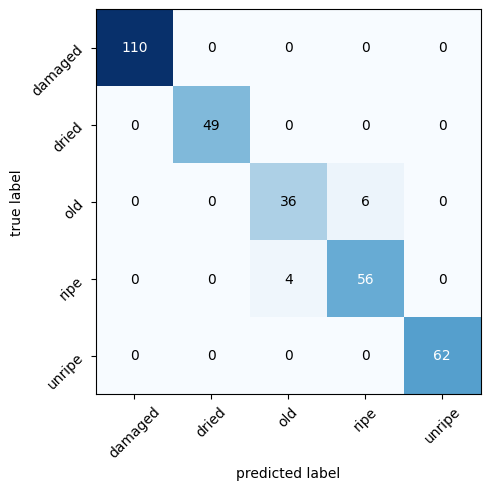

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00       110
       dried       1.00      1.00      1.00        49
         old       0.90      0.86      0.88        42
        ripe       0.90      0.93      0.92        60
      unripe       1.00      1.00      1.00        62

    accuracy                           0.97       323
   macro avg       0.96      0.96      0.96       323
weighted avg       0.97      0.97      0.97       323

==========================F1 Score====================
F1 Score :  0.9592163134746101


In [7]:
# Confusion Matrix and Classification Report
target_names = ['damaged','dried','old','ripe','unripe']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DenseNet121_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Bell_Paper_DenseNet1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Bell_Paper_DenseNet1)

# DenseNet 2

In [9]:
# load model
DenseNet121_Model2 = tf.keras.models.load_model('BellPaper_DenseNet2_model')

In [10]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DenseNet121_Model2 = DenseNet121_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DenseNet121_Model2[1]*100))
print("Loss: %.6f%%" % (scores_DenseNet121_Model2[0]*100))

==========================Evaluate Model====================
323/323 [==============================] - 9s 23ms/step - loss: 0.0416 - accuracy: 0.9938
Accuracy: 99.380803%
Loss: 4.155298%


==========================Confusion Matrix====================
323/323 [==============================] - 8s 22ms/step


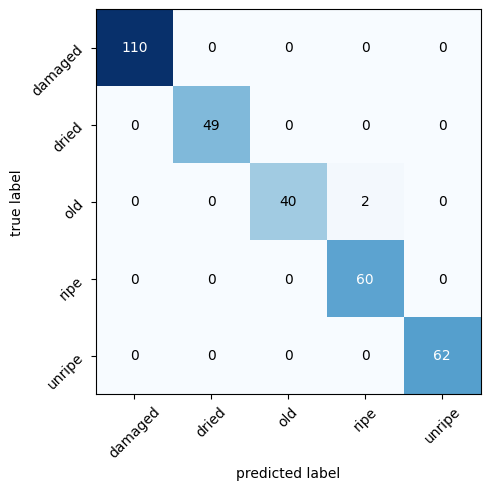

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00       110
       dried       1.00      1.00      1.00        49
         old       1.00      0.95      0.98        42
        ripe       0.97      1.00      0.98        60
      unripe       1.00      1.00      1.00        62

    accuracy                           0.99       323
   macro avg       0.99      0.99      0.99       323
weighted avg       0.99      0.99      0.99       323

==========================F1 Score====================
F1 Score :  0.9918432626949221


In [11]:
# Confusion Matrix and Classification Report
target_names = ['damaged','dried','old','ripe','unripe']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DenseNet121_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Bell_Paper_DenseNet2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Bell_Paper_DenseNet2)

# MobileNetV2 1

In [12]:
# load model
MobileNetV2_Model1 = tf.keras.models.load_model('BellPaper_MobileNetV2_model')

In [13]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNetV2_Model1 = MobileNetV2_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNetV2_Model1[1]*100))
print("Loss: %.6f%%" % (scores_MobileNetV2_Model1[0]*100))

==========================Evaluate Model====================
323/323 [==============================] - 4s 10ms/step - loss: 0.0581 - accuracy: 0.9783
Accuracy: 97.832817%
Loss: 5.807427%


==========================Confusion Matrix====================
323/323 [==============================] - 4s 9ms/step


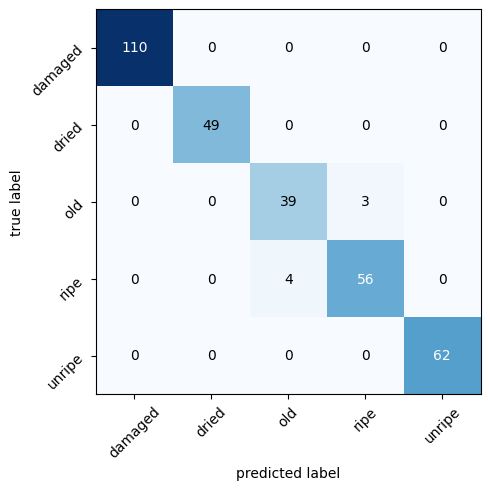

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00       110
       dried       1.00      1.00      1.00        49
         old       0.91      0.93      0.92        42
        ripe       0.95      0.93      0.94        60
      unripe       1.00      1.00      1.00        62

    accuracy                           0.98       323
   macro avg       0.97      0.97      0.97       323
weighted avg       0.98      0.98      0.98       323

==========================F1 Score====================
F1 Score :  0.9717647058823529


In [14]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNetV2_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Bell_Paper_MobileNetV2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Bell_Paper_MobileNetV2)

# MobileNetV2 2

In [15]:
# load model
MobileNetV2_Model2 = tf.keras.models.load_model('BellPaper_MobileNetV2_model2')

In [16]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNetV2_Model2 = MobileNetV2_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNetV2_Model2[1]*100))
print("Loss: %.6f%%" % (scores_MobileNetV2_Model2[0]*100))

==========================Evaluate Model====================
323/323 [==============================] - 4s 10ms/step - loss: 0.0727 - accuracy: 0.9721
Accuracy: 97.213620%
Loss: 7.268561%


==========================Confusion Matrix====================
323/323 [==============================] - 3s 9ms/step


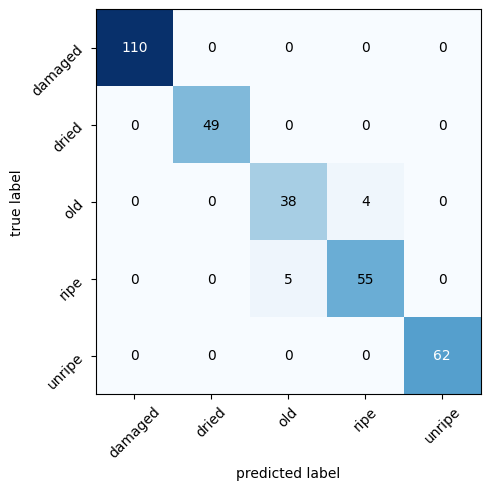

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00       110
       dried       1.00      1.00      1.00        49
         old       0.88      0.90      0.89        42
        ripe       0.93      0.92      0.92        60
      unripe       1.00      1.00      1.00        62

    accuracy                           0.97       323
   macro avg       0.96      0.96      0.96       323
weighted avg       0.97      0.97      0.97       323

==========================F1 Score====================
F1 Score :  0.9636974789915966


In [17]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNetV2_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Bell_Paper_MobileNetV2_2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Bell_Paper_MobileNetV2_2)

# Xception 1

In [18]:
# load model
Xception_Model1 = tf.keras.models.load_model('BellPaper_Xception_model')

In [19]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Model1 = Xception_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Model1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Model1[0]*100))

==========================Evaluate Model====================
323/323 [==============================] - 5s 11ms/step - loss: 0.1539 - accuracy: 0.9474
Accuracy: 94.736844%
Loss: 15.385775%


==========================Confusion Matrix====================
323/323 [==============================] - 4s 10ms/step


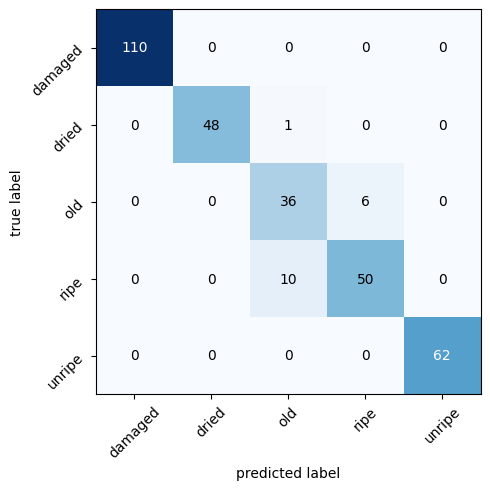

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00       110
       dried       1.00      0.98      0.99        49
         old       0.77      0.86      0.81        42
        ripe       0.89      0.83      0.86        60
      unripe       1.00      1.00      1.00        62

    accuracy                           0.95       323
   macro avg       0.93      0.93      0.93       323
weighted avg       0.95      0.95      0.95       323

==========================F1 Score====================
F1 Score :  0.932149690242334


In [20]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Bell_Paper_Xception = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Bell_Paper_Xception)

# Xception 2

In [21]:
# load model
Xception_Model2 = tf.keras.models.load_model('BellPaper_Xception_model2')

In [22]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Model2 = Xception_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Model2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Model2[0]*100))

==========================Evaluate Model====================
323/323 [==============================] - 4s 11ms/step - loss: 0.1440 - accuracy: 0.9628
Accuracy: 96.284831%
Loss: 14.397764%


==========================Confusion Matrix====================
323/323 [==============================] - 4s 9ms/step


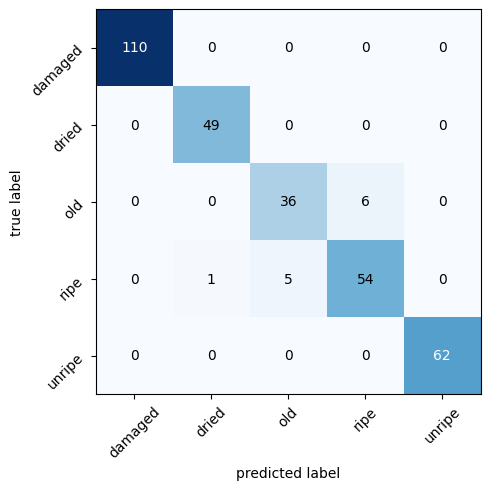

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      1.00      1.00       110
       dried       0.98      1.00      0.99        49
         old       0.88      0.86      0.87        42
        ripe       0.90      0.90      0.90        60
      unripe       1.00      1.00      1.00        62

    accuracy                           0.96       323
   macro avg       0.95      0.95      0.95       323
weighted avg       0.96      0.96      0.96       323

==========================F1 Score====================
F1 Score :  0.9514737738834125


In [23]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Bell_Paper_Xception2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Bell_Paper_Xception2)

# Comparison

In [26]:
# Make dictionary of all models
models = {
    "DenseNet121_Model1":DenseNet121_Model1,
    "DenseNet121_Model2":DenseNet121_Model2,
    "MobileNetV2_Model1":MobileNetV2_Model1,
    "MobileNetV2_Model2":MobileNetV2_Model2,
    "Xception_Model1":Xception_Model1,
    "Xception_Model2":Xception_Model2
}

# Make dictionary of all accuracy
accuracy = {
    "DenseNet121_Model1":scores_DenseNet121_Model1[1]*100,
    "DenseNet121_Model2":scores_DenseNet121_Model2[1]*100,
    "MobileNetV2_Model1":scores_MobileNetV2_Model1[1]*100,
    "MobileNetV2_Model2":scores_MobileNetV2_Model2[1]*100,
    "Xception_Model1":scores_Xception_Model1[1]*100,
    "Xception_Model2":scores_Xception_Model2[1]*100
}

# Make dictionary of all loss
loss = {
    "DenseNet121_Model1":scores_DenseNet121_Model1[0]*100,
    "DenseNet121_Model2":scores_DenseNet121_Model2[0]*100,
    "MobileNetV2_Model1":scores_MobileNetV2_Model1[0]*100,
    "MobileNetV2_Model2":scores_MobileNetV2_Model2[0]*100,
    "Xception_Model1":scores_Xception_Model1[0]*100,
    "Xception_Model2":scores_Xception_Model2[0]*100
}

# Make dictionary of all F1 Score
f1_score = {
    "DenseNet121_Model1":f1_Bell_Paper_DenseNet1,
    "DenseNet121_Model2":f1_Bell_Paper_DenseNet2,
    "MobileNetV2_Model1":f1_Bell_Paper_MobileNetV2,
    "MobileNetV2_Model2":f1_Bell_Paper_MobileNetV2_2,
    "Xception_Model1":f1_Bell_Paper_Xception,
    "Xception_Model2":f1_Bell_Paper_Xception2
}

# Make dataframe of all models, accuracy and loss
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values(), f1_score.values())), columns =['Model', 'Accuracy', 'Loss', 'F1'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model   Accuracy       Loss        F1
1  DenseNet121_Model2  99.380803   4.155298  0.991843
2  MobileNetV2_Model1  97.832817   5.807427  0.971765
3  MobileNetV2_Model2  97.213620   7.268561  0.963697
0  DenseNet121_Model1  96.904027   8.719029  0.959216
5     Xception_Model2  96.284831  14.397764  0.951474
4     Xception_Model1  94.736844  15.385775  0.932150


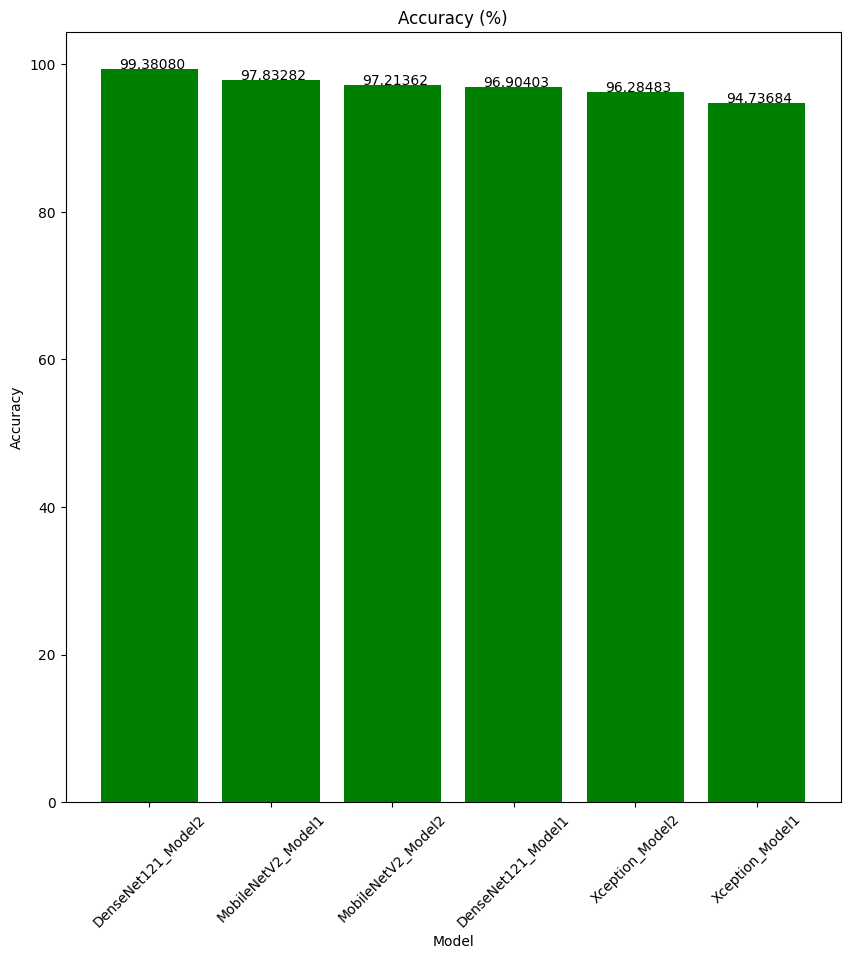

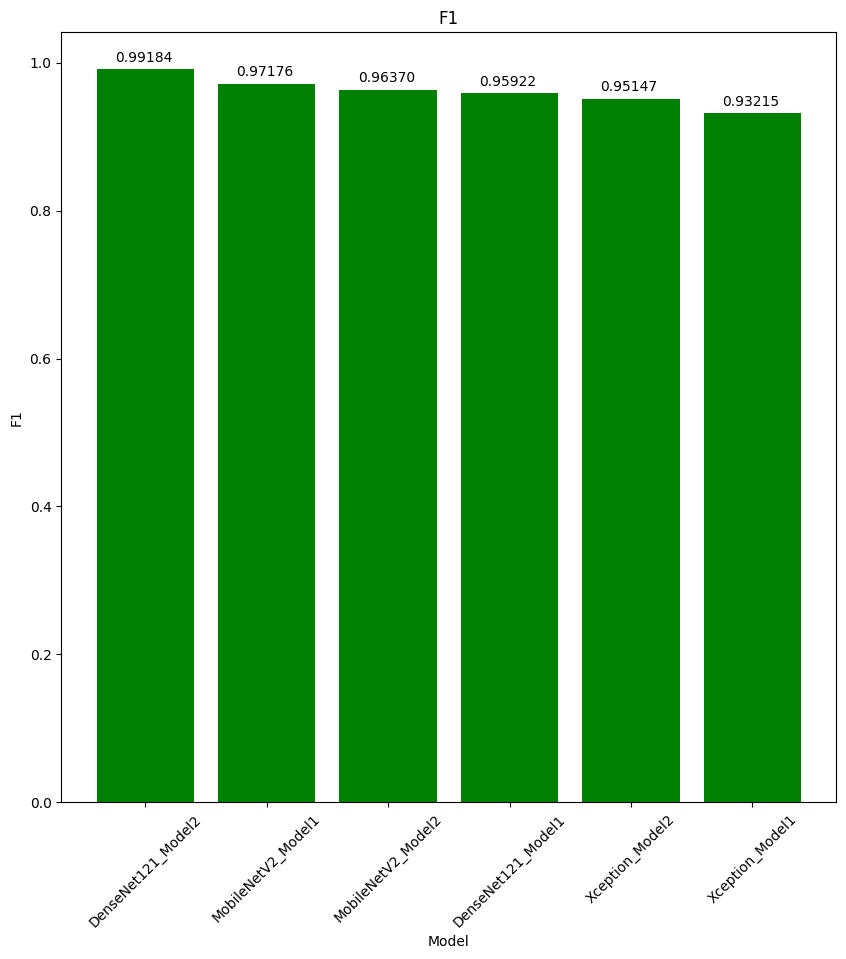

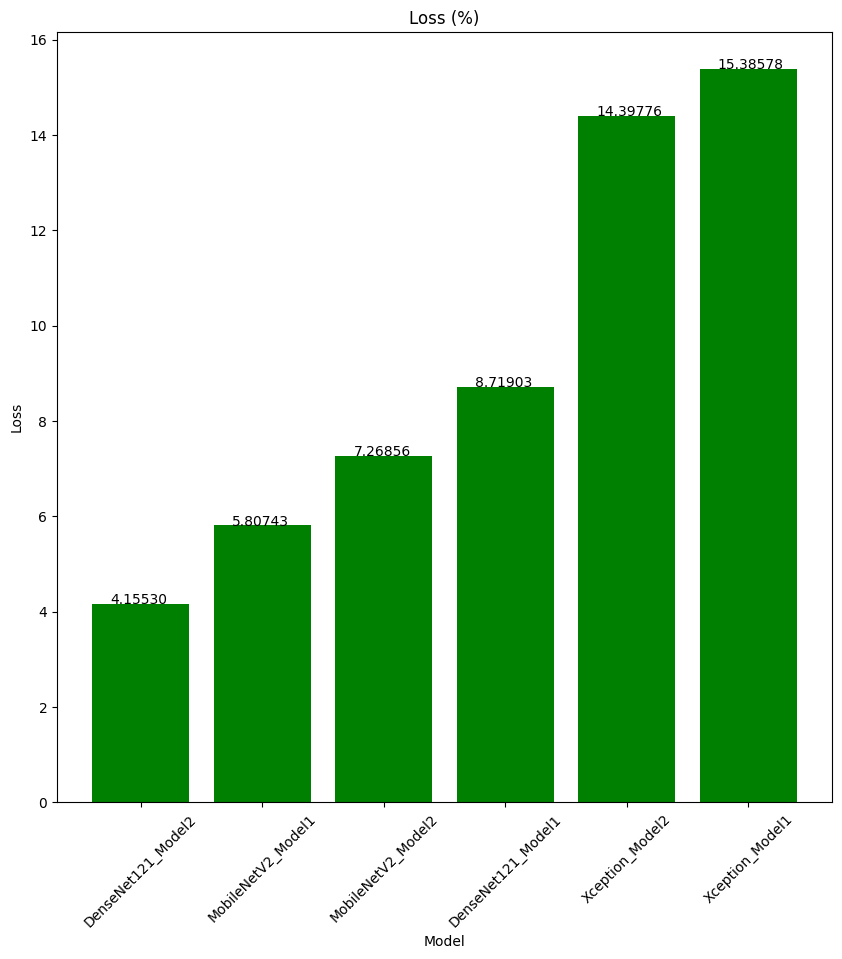

In [32]:
# make multiple plots for accuracy, f1 and loss with annotations
# Accuracy
plt.figure(figsize=(10, 10))
plt.title('Accuracy (%)')
plt.bar(df['Model'], df['Accuracy'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['Accuracy']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# F1
plt.figure(figsize=(10, 10))
plt.title('F1')
plt.bar(df['Model'], df['F1'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['F1']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('F1')
plt.show()

# Loss
plt.figure(figsize=(10, 10))
plt.title('Loss (%)')
plt.bar(df['Model'], df['Loss'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['Loss']):
    plt.text(i - 0.25, v + 0.0005, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('Loss')
plt.show()